# Individual Planning - Sarina Huang

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



In [11]:
players_data <- read_csv("https://raw.githubusercontent.com/sarinah1112/DSCI-100-Project/refs/heads/main/data/players.csv")
session_data <- read_csv("https://raw.githubusercontent.com/sarinah1112/DSCI-100-Project/refs/heads/main/data/sessions.csv")
players_data
session_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


# Data Description

In the player_data, there are 197 observations and 7 variables. 

The 7 variables are:
- experience: How good are they at Minecraft
- subscribed: Wheter or not subsribed to game-releated newsletters
- hashEmail: encrypted email of player
- played_hours: How many hours player spent in the server
- name: The player's name
- gender: The player's gener
- Age: The player's age

Potential problems are:
- NA in the dataset, which makes it harder to work with the data set
- Many player never playing the server (0.0 hours in played_hours), which does not represent a player since they never played and would affect the value of played_hours as a predictor
- Not enough observations, splitting will cause data to be even smaller

In session_data, there are 1535 observations and 5 variables.

Which are:
- hashedEmail: encrpted email of the player
- start_time: When player joined the game
- end_time: When player left the game
- original_start_time: original form of start_time
- original_end_time: original form of end_time

Potential problems are:
- start_time and end_time has multiple varables in one cell, which is an untidy dataset


# Question

Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific Question: Can Age and played_hours predict wheter or not a player subscribes to game-related newsletter?

player_data can provide player's subscription state and age and played hours

# Exploratory Data Analysis and Visulization

In [19]:
mean_data <- players_data |>
            summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
                     mean_age = mean(Age, na.rm = TRUE))
mean_data

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


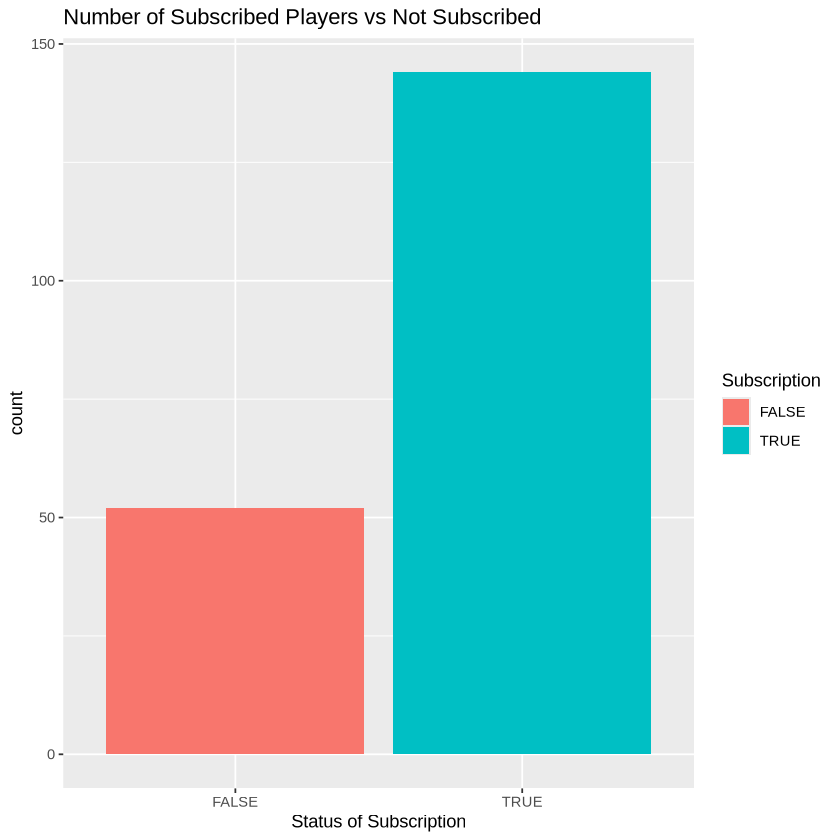

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


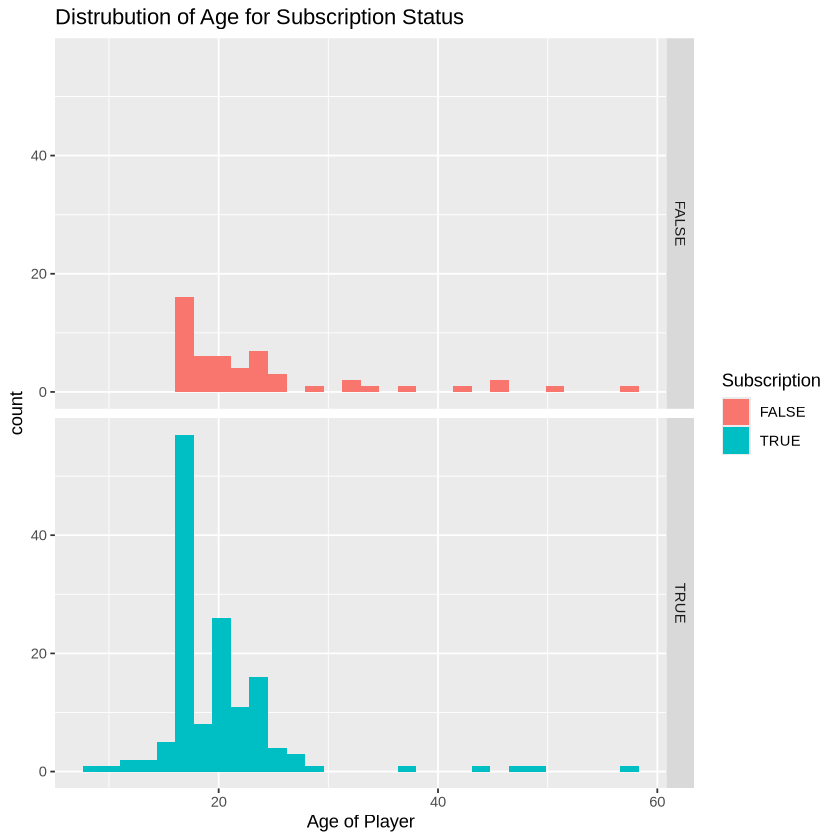

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


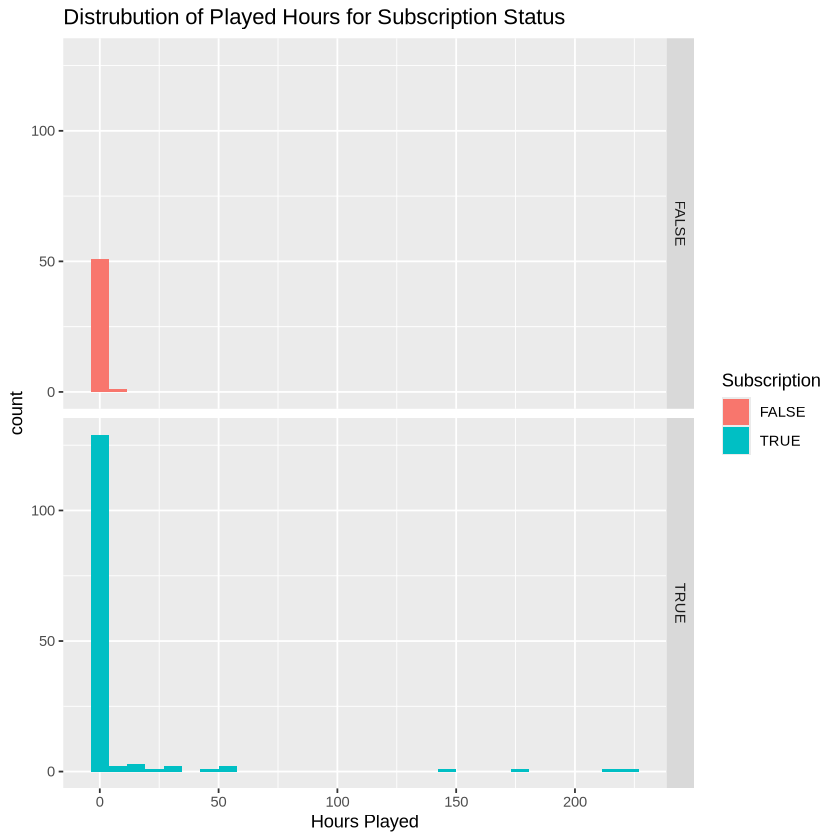

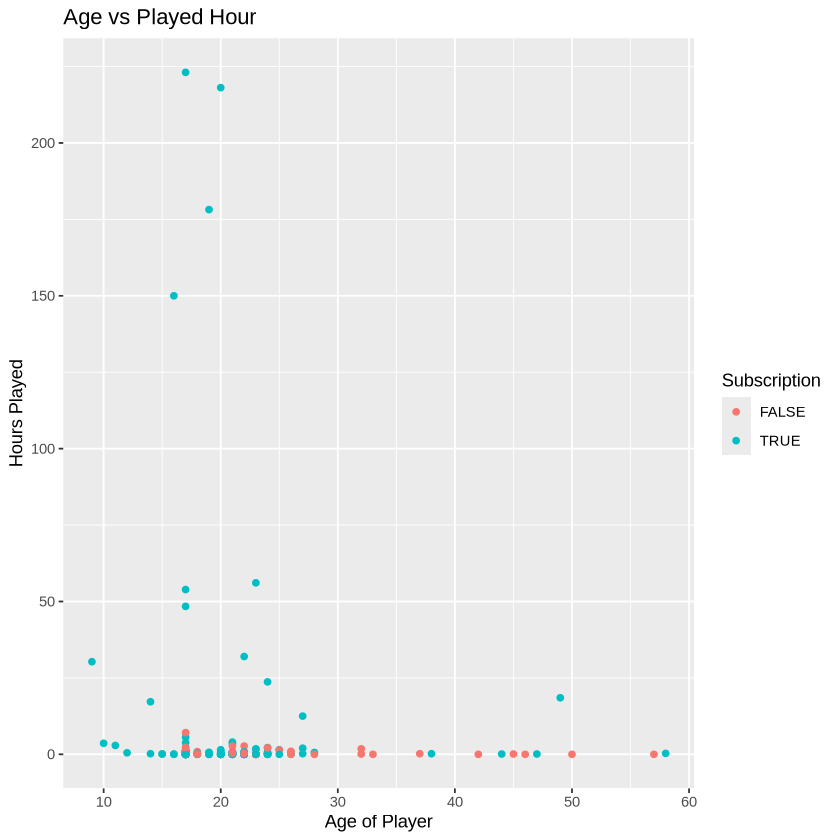

In [32]:
subscribed_histogram <- ggplot(players_data, aes(x = Age, fill = as_factor(subscribe))) +
                            geom_histogram() +
                            facet_grid(rows = vars(subscribe)) +
                            labs(x = "Age of Player", fill = "Subscription", title = "Distrubution of Age for Subscription Status") 
                            
hours_histogram <- ggplot(players_data, aes(x = played_hours, fill = as_factor(subscribe))) +
                            geom_histogram() +
                            facet_grid(rows = vars(subscribe)) +
                            labs(x = "Hours Played", fill = "Subscription", title = "Distrubution of Played Hours for Subscription Status")

subscribed_bar <- ggplot(players_data, aes(x = subscribe, fill = as_factor(subscribe))) +
                    geom_bar() +
                    labs(x = "Status of Subscription", fill = "Subscription", title = "Number of Subscribed Players vs Not Subscribed")

subscribed_plot <- ggplot(players_data, aes(x = Age, y = played_hours, color = as_factor(subscribe))) +
                    geom_point() +
                    labs(x = "Age of Player", y = "Hours Played", color = "Subscription", title = "Age vs Played Hour")



subscribed_bar 
subscribed_histogram
hours_histogram
subscribed_plot

The mean hours played is 5.85 hours and the mean age is 21.14. 
When looking at subscribed_bar, we can see that the amount of player who subscribes to game-related news are around triple the amount that aren't. While looking at subscribed_histogram, we can see that the ages are distrubuted similarly in non-subscribers and subscribers. The most common age group being around 17. When looking at hours_histogram, we  can see most players played around 0 hours, with people that played a lot all subscribed. In subscribed plot, we see again that most players barely played, with people that played more being subscribed.

# Methods and Plan

I chose knn classificaton because we are trying to predict a class using other variables. Some possible limitations are that most players have played_hours near zero, and that there isn't a significant relationship between age and played hours. This may cause the prediction to have low accuracy overall.

- use knn classification: Trying to use two predictors to predict a class, which is subscribed or not
- Split into training and testing, 70% and 30%: To test how well our model did
- Split the training even more: split into 3 folds to find the best accuracy and use that as K
- Use nearest neighbor classification to train training
- Test how well it predicts with testing

